In [ ]:
import matplotlib.pyplot as plt
from keras import models,datasets
from keras import layers
from keras.utils import to_categorical
import cv2
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab Notebooks/flowers

/content/drive/MyDrive/Colab Notebooks/flowers


In [ ]:
ls


checkpoint  flowers_classification_weights.data-00000-of-00001  sunflower/
daisy/      flowers_classification_weights.index                tulip/
dandelion/  rose/


In [ ]:
from pathlib import Path
path = Path('/content/drive/MyDrive/Colab Notebooks/flowers/')
class_names = list(path.glob('*'))
print(str(class_names[0]).split('/')[-1])
print(list(class_names[0].glob('*'))[0])

tulip
/content/drive/MyDrive/Colab Notebooks/flowers/tulip/10128546863_8de70c610d.jpg


In [ ]:
X = []
y = []
flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
flowers.index('dandelion')
for class_name in class_names:
  print(class_name)
  images_path = list(class_name.glob('*'))
  for im_path in images_path:
    img = cv2.imread(str(im_path))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64))
    label = flowers.index(str(class_name).split('/')[-1])
    X.append(img)
    y.append(label)

/content/drive/MyDrive/Colab Notebooks/flowers/tulip
/content/drive/MyDrive/Colab Notebooks/flowers/sunflower
/content/drive/MyDrive/Colab Notebooks/flowers/daisy
/content/drive/MyDrive/Colab Notebooks/flowers/rose
/content/drive/MyDrive/Colab Notebooks/flowers/dandelion
/content/drive/MyDrive/Colab Notebooks/flowers/flowers_classification_weights.data-00000-of-00001
/content/drive/MyDrive/Colab Notebooks/flowers/flowers_classification_weights.index
/content/drive/MyDrive/Colab Notebooks/flowers/checkpoint


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

[0. 0. 0. 0. 1.]
(3453, 64, 64, 3)
(864, 64, 64, 3)
(3453, 5)
(864, 5)


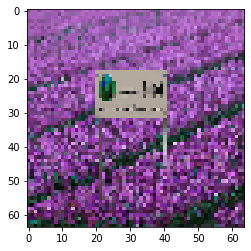

In [ ]:
plt.imshow(X_train[8])
print(y_train[8])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# ANN
model = models.Sequential()
model.add(layers.Flatten(input_shape=[64, 64, 3]))

model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 500)               6144500   
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 5)                 2

In [ ]:
# CNN
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential,Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 128)       

In [ ]:
# X_train = X_train.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255
# X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(3453, 5, 2)
(864, 5, 2)


In [ ]:
print(X_train.shape)

(3453, 64, 64, 3)


In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
27/27 [==============================] - 11s 30ms/step - loss: 1.4911 - accuracy: 0.3438
Epoch 2/100
27/27 [==============================] - 1s 19ms/step - loss: 1.1954 - accuracy: 0.4917
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 1.0935 - accuracy: 0.5540
Epoch 4/100
27/27 [==============================] - 1s 19ms/step - loss: 1.0232 - accuracy: 0.5931
Epoch 5/100
27/27 [==============================] - 1s 19ms/step - loss: 0.9446 - accuracy: 0.6212
Epoch 6/100
27/27 [==============================] - 1s 19ms/step - loss: 0.8839 - accuracy: 0.6528
Epoch 7/100
27/27 [==============================] - 1s 19ms/step - loss: 0.8290 - accuracy: 0.6719
Epoch 8/100
27/27 [==============================] - 1s 19ms/step - loss: 0.7670 - accuracy: 0.6965
Epoch 9/100
27/27 [==============================] - 1s 19ms/step - loss: 0.7132 - accuracy: 0.7153
Epoch 10/100
27/27 [==============================] - 1s 19ms/step - loss: 0.6328 - accuracy: 0.765

In [ ]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.6655


[2.3033924102783203, 0.6655092835426331]

(64, 64, 3)
1/1 [==============================] - 0s 16ms/step
rose


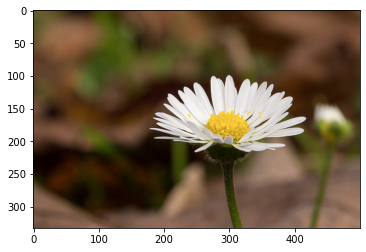

In [ ]:
import cv2
# url = 'download (5).jpeg'
# n=2
n+=1
images_test = list(Path('/content/drive/MyDrive/Colab Notebooks/flowers/daisy').glob('*g'))
# print(images_test)
url = images_test[n]
image = cv2.imread(str(url))
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img, (64,64))
img = img.astype('float32')/255
print(img.shape)
pred = model.predict(img.reshape((1, 64, 64, 3)))
print(flowers[pred.argmax()])